# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0-alpha.fix.417'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

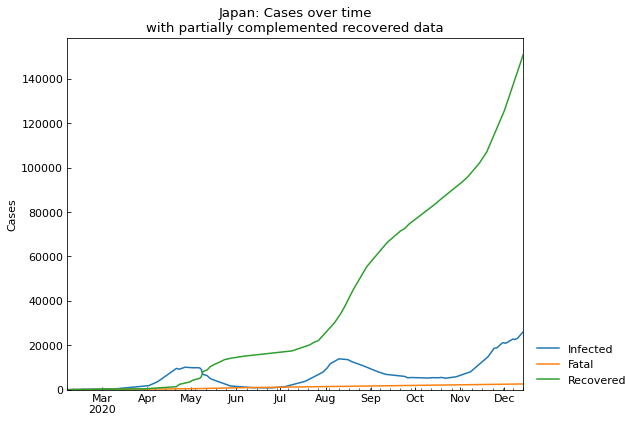

,Date,Confirmed,Infected,Fatal,Recovered
308,2020-12-10,168573,23102,2465,143006
309,2020-12-11,171542,24026,2502,145014
310,2020-12-12,174299,24241,2534,147524
311,2020-12-13,177287,25439,2562,149286
312,2020-12-14,179653,26121,2585,150947


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of new cases with `Scenario.record_diff()` method.

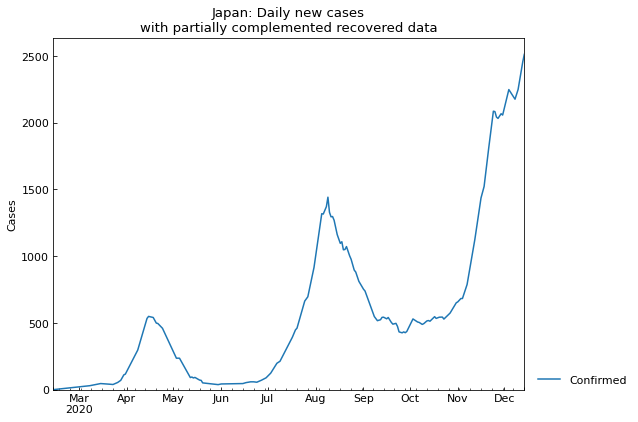

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

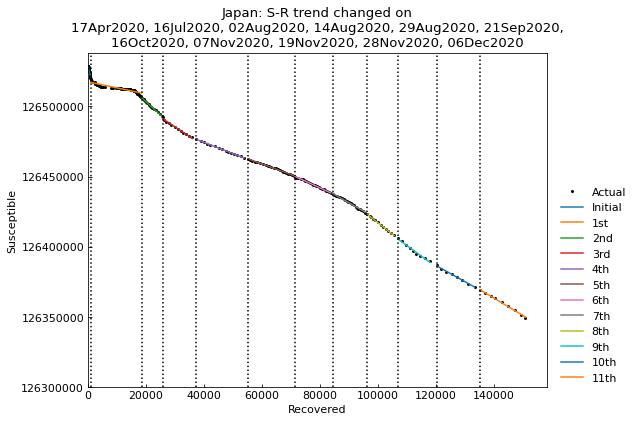

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,15Jul2020,126529100
2nd,Past,16Jul2020,01Aug2020,126529100
3rd,Past,02Aug2020,13Aug2020,126529100
4th,Past,14Aug2020,28Aug2020,126529100
5th,Past,29Aug2020,20Sep2020,126529100
6th,Past,21Sep2020,15Oct2020,126529100
7th,Past,16Oct2020,06Nov2020,126529100
8th,Past,07Nov2020,18Nov2020,126529100
9th,Past,19Nov2020,27Nov2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 6th phase (07Nov2020 - 18Nov2020): finished 2807 trials in 3 min  0 sec


	 2nd phase (16Jul2020 - 01Aug2020): finished  296 trials in 0 min 20 sec

	 3rd phase (14Aug2020 - 28Aug2020): finished  306 trials in 0 min 20 sec

	 9th phase (28Nov2020 - 05Dec2020): finished  693 trials in 0 min 50 sec

	 0th phase (02Aug2020 - 13Aug2020): finished 2211 trials in 3 min  1 sec

	10th phase (06Feb2020 - 16Apr2020): finished 2168 trials in 3 min  1 sec

	 5th phase (16Oct2020 - 06Nov2020): finished 2316 trials in 3 min  0 sec

	11th phase (21Sep2020 - 15Oct2020): finished  735 trials in 0 min 40 sec

	 8th phase (19Nov2020 - 27Nov2020): finished 2327 trials in 3 min  1 sec

	 1st phase (06Dec2020 - 14Dec2020): finished  223 trials in 0 min 10 sec

	 7th phase (29Aug2020 - 20Sep2020): finished  228 trials in 0 min 10 sec

	 4th phase (17Apr2020 - 15Jul2020): finished 3025 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.80,0.021315,0.000112,0.103006,0.020872,1440,47,8903,0.021,9,0.257967,2168,3 min 1 sec
1st,Past,17Apr2020,15Jul2020,126529100,SIR-F,0.53,0.080691,0.000663,0.031904,0.054611,1440,18,1508,0.081,31,0.354081,3025,3 min 0 sec
2nd,Past,16Jul2020,01Aug2020,126529100,SIR-F,2.02,0.000482,0.000097,0.138591,0.068643,1440,14,10264,0.000,7,0.025995,296,0 min 20 sec
3rd,Past,02Aug2020,13Aug2020,126529100,SIR-F,1.60,0.000565,0.000310,0.105239,0.065501,1440,15,3220,0.001,9,0.040150,2211,3 min 1 sec
4th,Past,14Aug2020,28Aug2020,126529100,SIR-F,0.76,0.001183,0.000945,0.076978,0.099679,1440,10,1057,0.001,12,0.034487,306,0 min 20 sec
5th,Past,29Aug2020,20Sep2020,126529100,SIR-F,0.76,0.000196,0.001444,0.076137,0.098509,1440,10,692,0.000,13,0.017391,228,0 min 10 sec
6th,Past,21Sep2020,15Oct2020,126529100,SIR-F,0.91,0.000427,0.001171,0.093053,0.101526,1440,9,853,0.000,10,0.029879,735,0 min 40 sec
7th,Past,16Oct2020,06Nov2020,126529100,SIR-F,1.09,0.000260,0.001282,0.118419,0.106840,1440,9,780,0.000,8,0.033210,2316,3 min 0 sec
8th,Past,07Nov2020,18Nov2020,126529100,SIR-F,1.59,0.001183,0.000857,0.140835,0.087562,1440,11,1167,0.001,7,0.010202,2807,3 min 0 sec
9th,Past,19Nov2020,27Nov2020,126529100,SIR-F,1.56,0.000629,0.000886,0.129866,0.082304,1440,12,1128,0.001,7,0.022821,2327,3 min 1 sec


### Accuracy of estimation

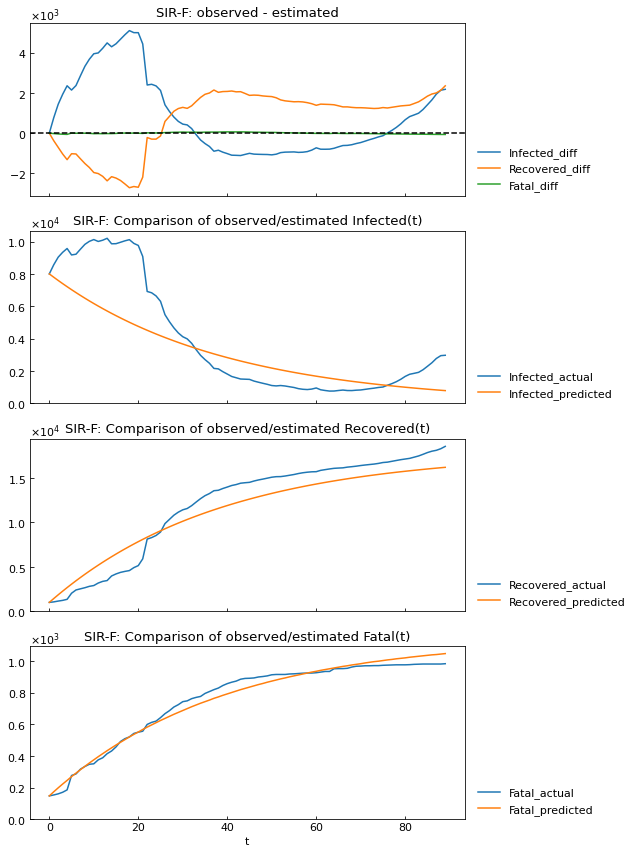

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [12]:
snl.get("Rt", phase="4th")

0.76

### Show parameter history

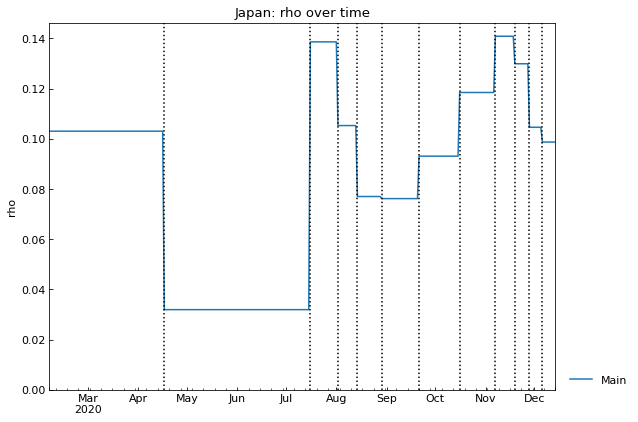

In [13]:
_ = snl.history(target="rho")

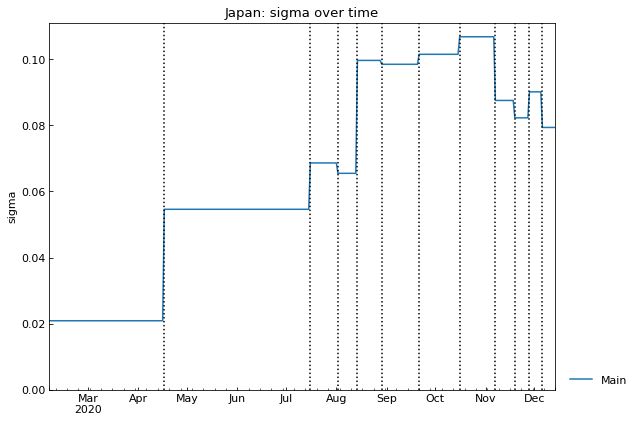

In [14]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

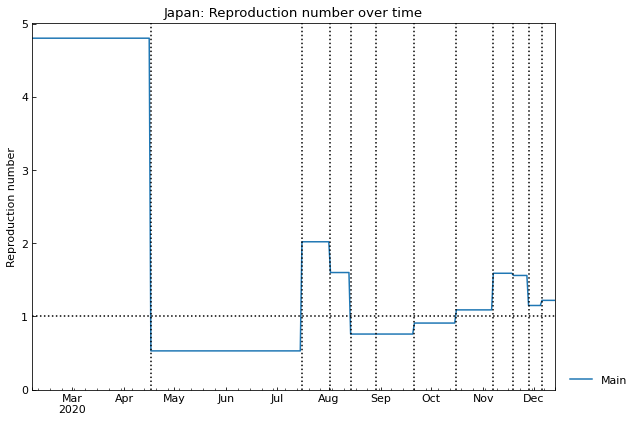

In [15]:
_ = snl.history(target="Rt")

### Simulate the number of cases

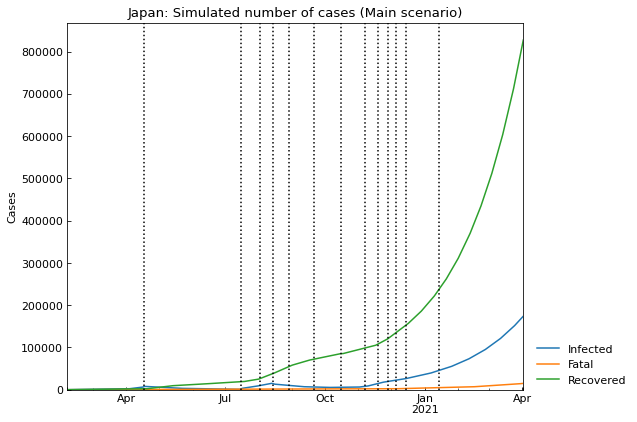

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,950323,13958,162454,773911
418,2021-03-30,966369,14195,165254,786920
419,2021-03-31,982690,14437,168099,800154
420,2021-04-01,999287,14682,170991,813614
421,2021-04-02,1016167,14932,173930,827305


In [16]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [17]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.07938796999605811

In [18]:
sigma_new = sigma_current * 2
sigma_new

0.15877593999211623

In [19]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.80   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.53   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  2.02   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.60   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.76   
         5th      Past  29Aug2020  20Sep2020   126529100  SIR-F  0.76   
         6th      Past  21Sep2020  15Oct2020   126529100  SIR-F  0.91   
         7th      Past  16Oct2020  06Nov2020   126529100  SIR-F  1.09   
         8th      Past  07Nov2020  18Nov2020   126529100  SIR-F  1.59   
         9th      Past  19Nov2020  27Nov2020   126529100  SIR-F  1.56   
         10th     Past  28Nov2020  05Dec2020   126529100  SIR-F  1.15   
         11th     Past  06Dec2020  14Dec2020   126529100  SIR-F  1.22   
         12th   Future  15Dec2020  13Jan2021   126529100  SIR-F  1.22   
         13th   Future  14Jan2021  01Apr2021   126529100  SIR-F  1.22   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.80   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.53   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  2.02   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.60   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.76   
         5th      Past  29Aug2020  20Sep2020   126529100  SIR-F  0.76   
         6th      Past  21Sep2020  15Oct2020   126529100  SIR-F  0.91   
         7th      Past  16Oct2020  06Nov2020   126529100  SIR-F  1.09   
         8th      Past  07Nov2020  18Nov2020   126529100  SIR-F  1.59   
         9th      Past  19Nov2020  27Nov2020   126529100  SIR-F  1.56   
         10th     Past  28Nov2020  05Dec2020   126529100  SIR-F  1.15   
         11th     Past  06Dec2020  14Dec2020   126529100  SIR-F  1.22   
         12th   Future  15Dec2020  13Jan2021   126529100  SIR-F  1.22   
         13th   Future  14Jan2021  01Apr2021   126529100  SIR-F  0.62   

                   theta     kappa       rho     sigma   tau  1/gamma [day]  \
Scenario Phase                                                                
Main     0th    0.021315  0.000112  0.103006  0.020872  1440             47   
         1st    0.080691  0.000663  0.031904  0.054611  1440             18   
         2nd    0.000482  0.000097  0.138591  0.068643  1440             14   
         3rd    0.000565  0.000310  0.105239  0.065501  1440             15   
         4th    0.001183  0.000945  0.076978  0.099679  1440             10   
         5th    0.000196  0.001444  0.076137  0.098509  1440             10   
         6th    0.000427  0.001171  0.093053  0.101526  1440              9   
         7th    0.000260  0.001282  0.118419  0.106840  1440              9   
         8th    0.001183  0.000857  0.140835  0.087562  1440             11   
         9th    0.000629  0.000886  0.129866  0.082304  1440             12   
         10th   0.000996  0.001051  0.104559  0.090165  1440             11   
         11th   0.000260  0.001422  0.098665  0.079388  1440             12   
         12th   0.000260  0.001422  0.098665  0.079388  1440             12   
         13th   0.000260  0.001422  0.098665  0.079388  1440             12   
Medicine 0th    0.021315  0.000112  0.103006  0.020872  1440             47   
         1st    0.080691  0.000663  0.031904  0.054611  1440             18   
         2nd    0.000482  0.000097  0.138591  0.068643  1440             14   
         3rd    0.000565  0.000310  0.105239  0.065501  1440             15   
         4th    0.001183  0.000945  0.076978  0.099679  1440             10   
         5th    0.000196  0.001444  0.076137  0.098509  1440             10   
         6th    0.000427  0.001171  0.093053  0.101526  1440              9   
         7

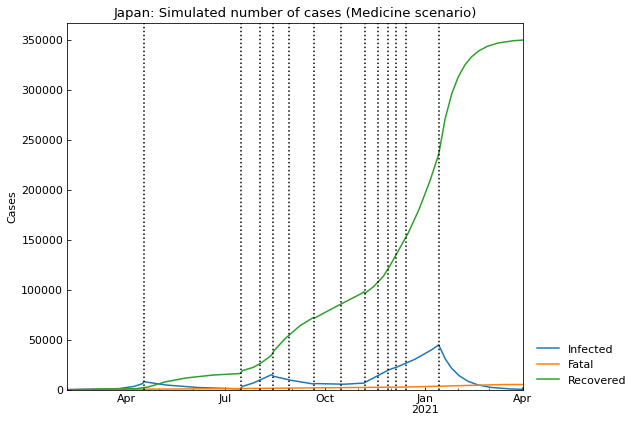

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,355180,5183,464,349533
418,2021-03-30,355224,5183,436,349605
419,2021-03-31,355266,5184,410,349672
420,2021-04-01,355305,5184,386,349735
421,2021-04-02,355342,5185,363,349794


In [20]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [21]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,173930,02Apr2021,1016167,173930,14932,1.22
Medicine,44818,14Jan2021,355342,363,5185,0.62


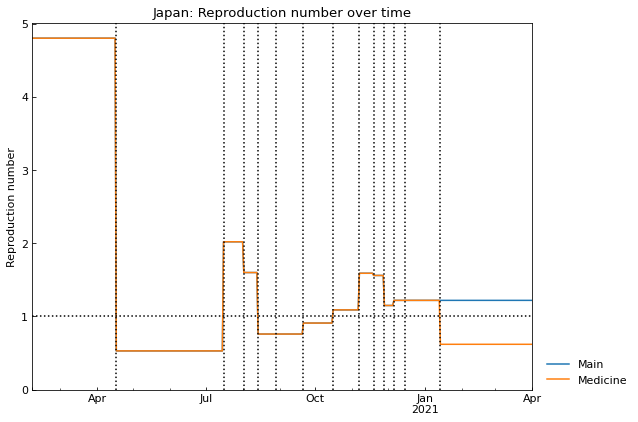

In [22]:
_ = snl.history(target="Rt")

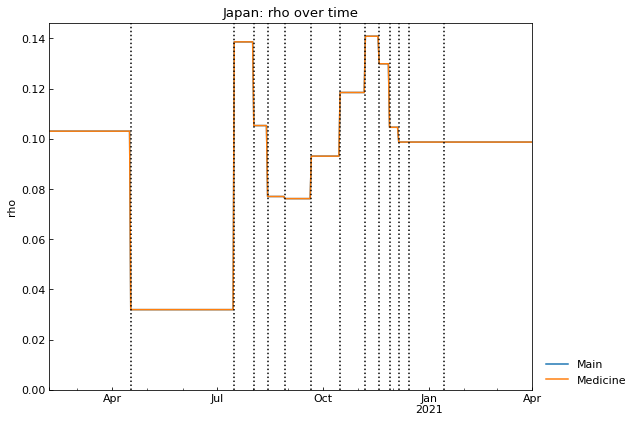

In [23]:
_ = snl.history(target="rho")

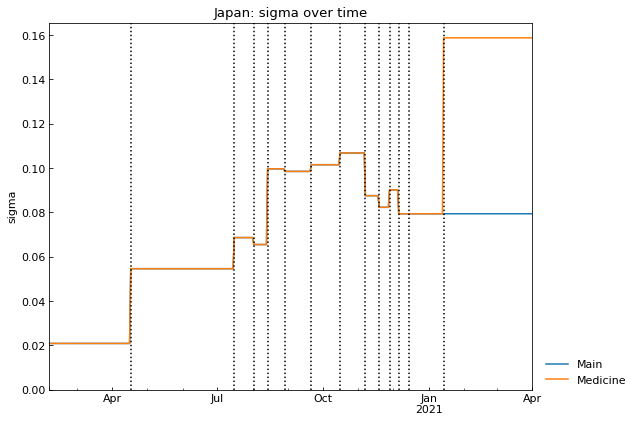

In [24]:
_ = snl.history(target="sigma")

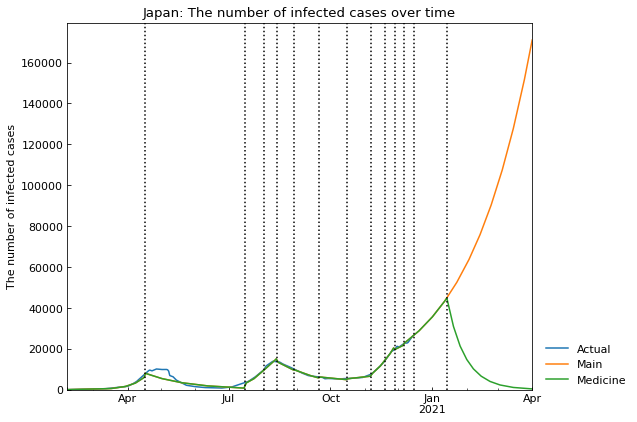

In [25]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

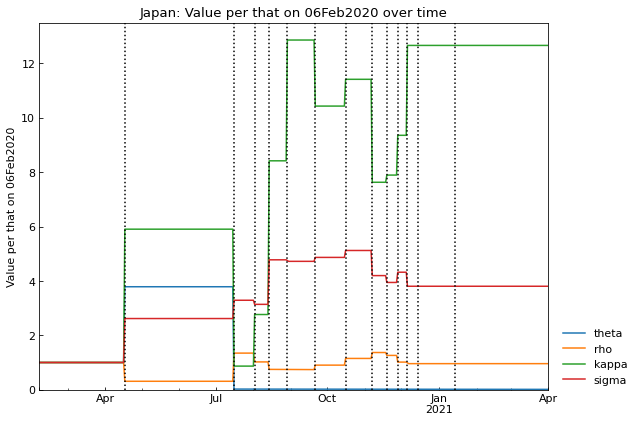

In [26]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [27]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 6th phase (07Nov2020 - 18Nov2020): finished 2803 trials in 3 min  0 sec


	12th phase (16Jul2020 - 01Aug2020): finished  357 trials in 0 min 20 sec

	 9th phase (28Nov2020 - 05Dec2020): finished  659 trials in 0 min 40 sec

	 2nd phase (14Aug2020 - 28Aug2020): finished  336 trials in 0 min 20 sec

	 0th phase (02Aug2020 - 13Aug2020): finished 2405 trials in 3 min  0 sec

	10th phase (06Feb2020 - 16Apr2020): finished 2362 trials in 3 min  1 sec

	 4th phase (01Sep2020 - 20Sep2020): finished  222 trials in 0 min 10 sec

	 3rd phase (16Oct2020 - 06Nov2020): finished 2493 trials in 3 min  1 sec

	 5th phase (19Nov2020 - 27Nov2020): finished 2448 trials in 3 min  1 sec

	11th phase (21Sep2020 - 15Oct2020): finished  683 trials in 0 min 40 sec

	 1st phase (06Dec2020 - 14Dec2020): finished  209 trials in 0 min 10 sec

	 7th phase (29Aug2020 - 31Aug2020): finished  211 trials in 0 min 10 sec

	 8th phase (17Apr2020 - 15Jul2020): finished 2849 trials in 3 min  0 sec

Completed optimization. Total: 9 min  4 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 3rd phase (01Sep2020 - 14Dec2020): finished 6805 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [28]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.80  0.021315  0.000112   
              1st    17Apr2020  15Jul2020  SIR-F  0.53  0.080691  0.000663   
              2nd    16Jul2020  01Aug2020  SIR-F  1.99  0.000432  0.000098   
              3rd    02Aug2020  13Aug2020  SIR-F  1.62  0.000208  0.000280   
              4th    14Aug2020  28Aug2020  SIR-F  0.76  0.001183  0.000945   
              5th    29Aug2020  31Aug2020  SIR-F  1.00  0.000948  0.000556   
              6th    01Sep2020  20Sep2020  SIR-F  0.77  0.000202  0.001447   
              7th    21Sep2020  15Oct2020  SIR-F  0.92  0.000830  0.000930   
              8th    16Oct2020  06Nov2020  SIR-F  1.09  0.000260  0.001282   
              9th    07Nov2020  18Nov2020  SIR-F  1.59  0.001183  0.000857   
              10th   19Nov2020  27Nov2020  SIR-F  1.56  0.000629  0.000886   
              11th   28Nov2020  05Dec2020  SIR-F  1.15  0.000996  0.001051   
              12th   06Dec2020  14Dec2020  SIR-F  1.22  0.000260  0.001422   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.80  0.021315  0.000112   
              1st    17Apr2020  15Jul2020  SIR-F  0.53  0.080691  0.000663   
              2nd    16Jul2020  01Aug2020  SIR-F  1.99  0.000432  0.000098   
              3rd    02Aug2020  13Aug2020  SIR-F  1.62  0.000208  0.000280   
              4th    14Aug2020  28Aug2020  SIR-F  0.76  0.001183  0.000945   
              5th    29Aug2020  31Aug2020  SIR-F  1.00  0.000948  0.000556   
              6th    01Sep2020  14Dec2020  SIR-F  1.00  0.000948  0.000556   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.103006  0.020872  0.257967    2362  3 min  1 sec  
              1st    0.031904  0.054611  0.354081    2849  3 min  0 sec  
              2nd    0.140787  0.070585  0.025632     357  0 min 20 sec  
              3rd    0.105233  0.064798  0.040060    2405  3 min  0 sec  
              4th    0.076978  0.099679  0.034487     336  0 min 20 sec  
              5th    0.072812  0.071988  0.003679     211  0 min 10 sec  
              6th    0.077225  0.098651  0.021616     222  0 min 10 sec  
              7th    0.096578  0.103445  0.030606     683  0 min 40 sec  
              8th    0.118419  0.106840  0.033210    2493  3 min  1 sec  
              9th    0.140835  0.087562  0.010202    2803  3 min  0 sec  
              10th   0.129866  0.082304  0.022821    2448  3 min  1 sec  
              11th   0.104559  0.090165  0.017285     659  0 min 40 sec  
              12th   0.098665  0.079388  0.015627     209  0 min 10 sec  
Retrospective 0th    0.103006  0.020872  0.257967    2362  3 min  1 sec  
              1st    0.031904  0.054611  0.354081    2849  3 min  0 sec  
              2nd    0.140787  0.070585  0.025632     357  0 min 20 sec  
              3rd    0.105233  0.064798  0.040060    2405  3 min  0 sec  
              4th    0.076978  0.099679  0.034487     336  0 min 20 sec  
              5th    0.072812  0.071988  0.003679     211  0 min 10 sec  
              6th    0.072812  0.071988  0.318856    6805  3 min  0 sec

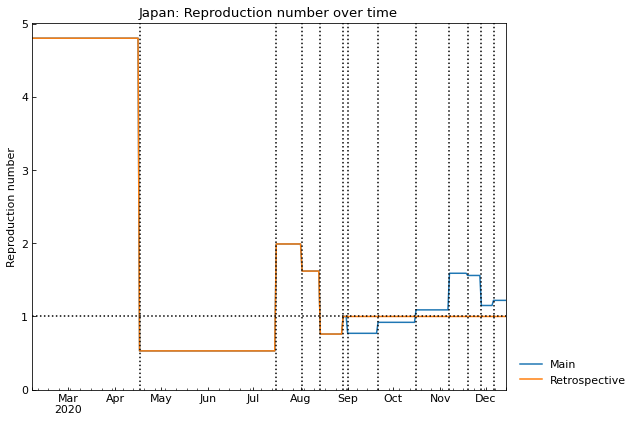

In [29]:
# History of reproduction number
_ = snl_retro.history("Rt")

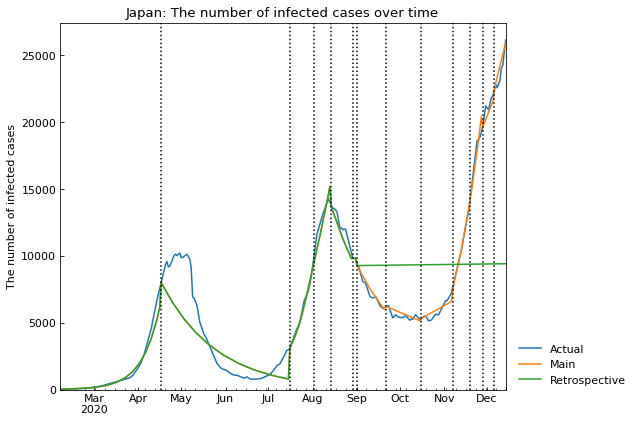

In [30]:
# History of Infected
_ = snl_retro.history("Infected")

In [31]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 15Dec2020,Infected on 15Dec2020,Fatal on 15Dec2020,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,26392,15Dec2020,181734,26392,2633,0.77,0.92,1.09,1.59,1.56,1.15,1.22
Retrospective,15189,13Aug2020,139772,9409,1909,1.00,-,-,-,-,-,-
